In [1]:
import os
import numpy as np
import torch
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch.distributions as distr
from collections import defaultdict

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# configure matplotlib
# %matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.5, 13.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from cdi.data.frey_faces import FreyFacesDataset
from cdi.util.analysis.show_frey_faces import show_examples
from cdi.trainers.complete_mle import CompleteMLE
from cdi.trainers.expectation_maximisation import EM
from cdi.trainers.mc_expectation_maximisation import MCEM

In [4]:
log_path_base = f'../../trained_models/{{}}'

In [5]:
def load_fa_model(method, checkpoint_path):   
    model = None
    if method == 'complete_mle':
        model = CompleteMLE.load_from_checkpoint(checkpoint_path)
    elif method == 'expectation-maximisation':
        model = EM.load_from_checkpoint(checkpoint_path)
    elif method == 'mc-expectation-maximisation':
        model = MCEM.load_from_checkpoint(checkpoint_path)
    else:
        raise(f'Invalid method: {method}')
    
    return model

# Defaults

In [6]:
original_dataset = FreyFacesDataset('../../data', preprocess=False)

# Generate dataset from FA model trained on complete data

In [7]:
dataset_name = 'frey_faces_processed/fa_for_synthetic_data'
load_model = 'latest'
fa_model = load_fa_model('complete_mle', '{}/fa_complete_data/m20190508_d20200325_20200406_20200407/saved_models/_ckpt_{}.ckpt'.format(log_path_base.format(dataset_name), load_model))
fa_model = fa_model.fa_model
mean, cov = fa_model.observable_marginal_parameters()
multi_gauss = distr.MultivariateNormal(loc=mean, covariance_matrix=cov)

In [8]:
seed = 20201016
np.random.seed(seed)
torch.manual_seed(seed)
generated_data = multi_gauss.sample(sample_shape=(10000,))
generated_data_postprocessed = original_dataset.postprocess(generated_data)
# generated_data_postprocessed = generated_data

In [9]:
original_dataset.preprocess(generated_data_postprocessed.max())

tensor(3.1991)

In [10]:
generated_data_postprocessed.max()

tensor(1.1583)

In [11]:
generated_data_postprocessed.min()

tensor(-0.1734)

In [12]:
generated_data_postprocessed.argmin()

tensor(478960)

In [13]:
generated_data_postprocessed.argmax()

tensor(188599)

(array([2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 5.00000e+00, 7.00000e+00, 1.50000e+01, 2.30000e+01,
        6.30000e+01, 8.40000e+01, 1.67000e+02, 2.95000e+02, 5.09000e+02,
        8.84000e+02, 1.44800e+03, 2.47900e+03, 4.26200e+03, 7.14200e+03,
        1.19260e+04, 1.90110e+04, 2.87770e+04, 4.13780e+04, 5.83000e+04,
        8.03300e+04, 1.11262e+05, 1.49462e+05, 1.79556e+05, 1.77237e+05,
        1.57545e+05, 1.33825e+05, 1.10151e+05, 9.16760e+04, 8.17240e+04,
        8.07810e+04, 8.05290e+04, 4.18050e+04, 1.49500e+04, 6.50800e+03,
        3.11200e+03, 1.43400e+03, 6.94000e+02, 3.37000e+02, 1.84000e+02,
        7.30000e+01, 2.90000e+01, 1.40000e+01, 2.00000e+00, 2.00000e+00]),
 array([-3.525333  , -3.3972797 , -3.2692266 , -3.1411731 , -3.01312   ,
        -2.8850667 , -2.7570136 , -2.6289601 , -2.500907  , -2.3728538 ,
        -2.2448006 , -2.1167471 , -1.988694  , -1.8606408 , -1.7325875 ,
        -1.6045343 , -1.476481  , -1.3484278 , -1

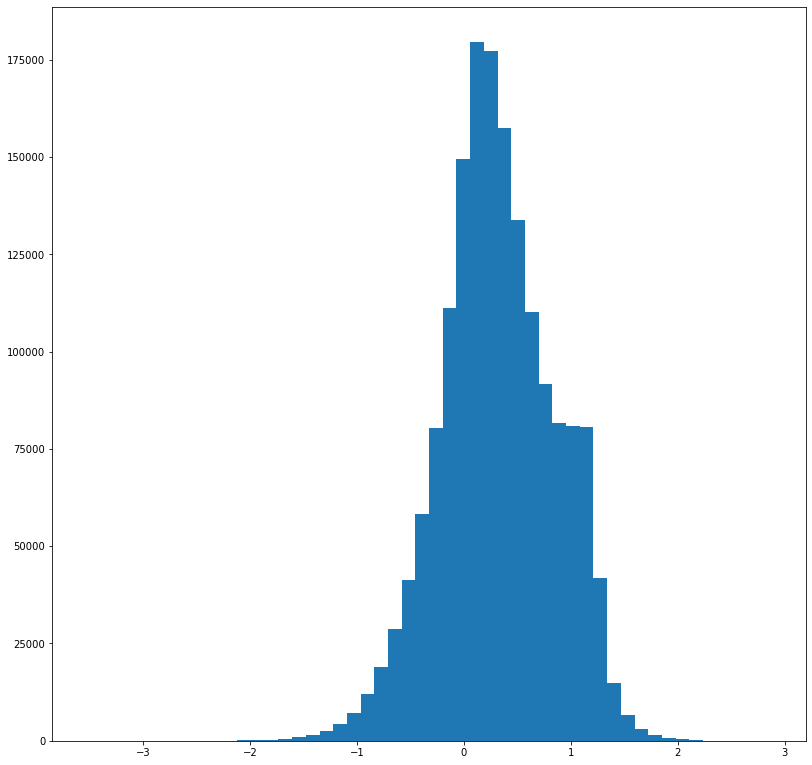

In [14]:
plt.hist(generated_data.flatten(), bins=50)

(array([3.00000e+00, 4.00000e+00, 2.00000e+01, 6.20000e+01, 1.11000e+02,
        2.18000e+02, 4.30000e+02, 6.56000e+02, 1.00500e+03, 1.54700e+03,
        2.31900e+03, 3.33200e+03, 4.81500e+03, 6.61500e+03, 9.18100e+03,
        1.21000e+04, 1.54190e+04, 1.94730e+04, 2.39470e+04, 2.89640e+04,
        3.48860e+04, 4.14440e+04, 4.98840e+04, 5.95920e+04, 7.14740e+04,
        8.39400e+04, 9.73990e+04, 1.04415e+05, 1.05317e+05, 1.01746e+05,
        9.57310e+04, 8.87000e+04, 8.13200e+04, 7.36490e+04, 6.68400e+04,
        6.11340e+04, 5.71570e+04, 5.71340e+04, 5.94290e+04, 6.45130e+04,
        5.07470e+04, 2.27130e+04, 1.04870e+04, 5.34300e+03, 2.69400e+03,
        1.25100e+03, 5.32000e+02, 2.40000e+02, 5.70000e+01, 1.10000e+01]),
 array([-0.17342864, -0.1471968 , -0.12096496, -0.09473312, -0.06850128,
        -0.04226944, -0.0160376 ,  0.01019424,  0.03642607,  0.06265792,
         0.08888976,  0.1151216 ,  0.14135343,  0.16758527,  0.19381711,
         0.22004895,  0.24628079,  0.2725126 ,  0

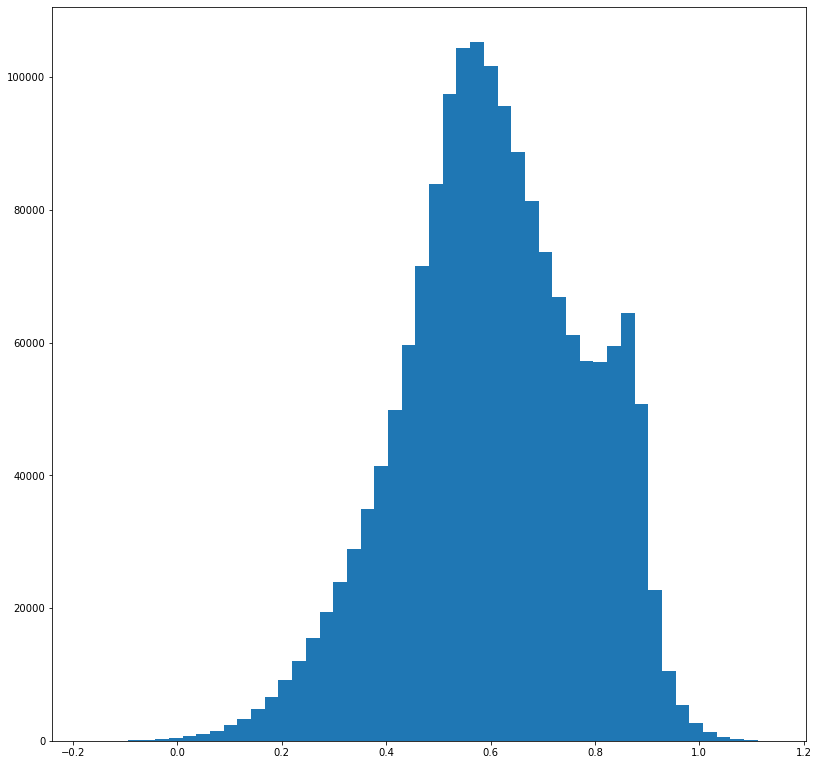

In [15]:
plt.hist(generated_data_postprocessed.flatten(), bins=50)

(array([ 1057.,   587.,   750.,  1104.,  1480.,  1942.,  2572.,  3444.,
         4444.,  5675.,  7237.,  8944., 10746., 13066., 15307., 18052.,
        20726., 24116., 27525., 31448., 36304., 41671., 47568., 54781.,
        62063., 69793., 76691., 79881., 80591., 78912., 76215., 72219.,
        68243., 64016., 59577., 55123., 51303., 47598., 44962., 43348.,
        43410., 44690., 47312., 49367., 37958., 20337., 10909.,  6291.,
         3773.,  4872.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ], dtype=float32),
 <a list of 50 Patch objects>)

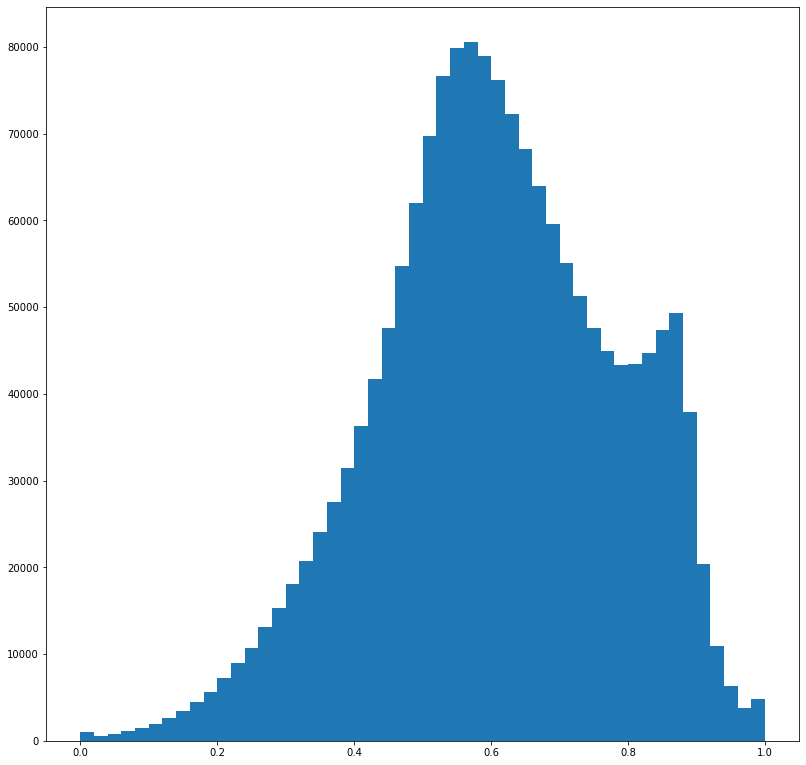

In [16]:
plt.hist(np.clip(generated_data_postprocessed.flatten(), 0, 1), bins=50)

To show the examples we clip them to [0,1] range.

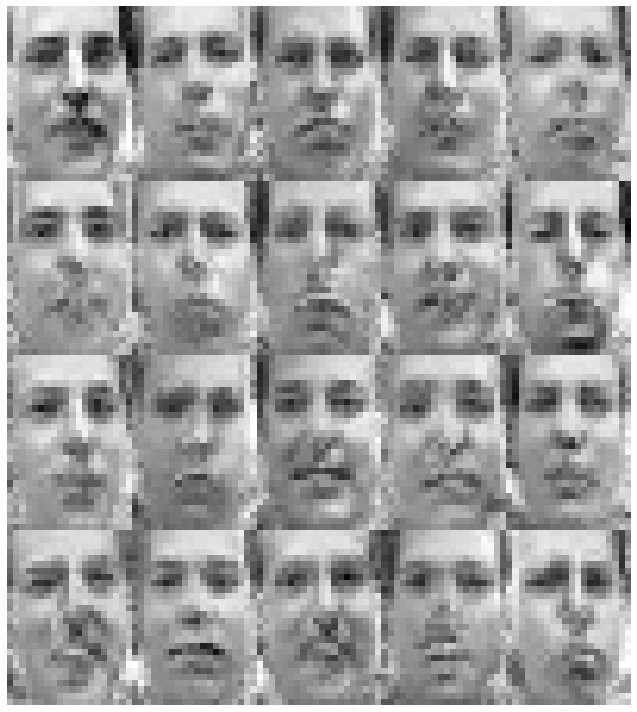

In [13]:
# Show examples
ids = np.random.choice(np.arange(len(generated_data_postprocessed)), 20)
show_data = np.clip(generated_data_postprocessed, 0, 1)[ids].detach().numpy()
# show_data = generated_data_postprocessed[ids].detach().numpy()
mask = np.ones_like(show_data)
show_examples(show_data, mask, n=20, n_cols=5, mask_missing=False)

## Save generated dataset to file

In [14]:
data = {
    "ff": generated_data_postprocessed.detach().numpy().T,
    "seed": seed,
    "F": fa_model.factor_loadings.detach().numpy(),
    "c": fa_model.mean.detach().numpy(),
    "Psi": np.exp(fa_model.log_cov.detach().numpy())
}

# Save and return samples
sio.savemat(file_name='../../data/frey_generated_large.mat', mdict=data)

### Create test data

In [15]:
seed = 202010161234
generated_data = multi_gauss.sample(sample_shape=(5000,))
generated_data_postprocessed = original_dataset.postprocess(generated_data)

data = {
    "ff": generated_data_postprocessed.detach().numpy().T,
    "seed": seed,
    "F": fa_model.factor_loadings.detach().numpy(),
    "c": fa_model.mean.detach().numpy(),
    "Psi": np.exp(fa_model.log_cov.detach().numpy())
}

# Save and return samples
sio.savemat(file_name='../../data/frey_generated_large_test.mat', mdict=data)